<a href="https://colab.research.google.com/github/HamzaGbada/Backend/blob/master/Node_classification_with_Edge_feature.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install dgl-cu113 dglgo -f https://data.dgl.ai/wheels/repo.html

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://data.dgl.ai/wheels/repo.html
     |████████████████████████████████| 239.2 MB 1.2 kB/s 
     |████████████████████████████████| 63 kB 1.9 MB/s 
     |████████████████████████████████| 280 kB 47.9 MB/s 
     |████████████████████████████████| 109 kB 50.7 MB/s 
     |████████████████████████████████| 78 kB 6.0 MB/s 
     |████████████████████████████████| 45 kB 3.3 MB/s 
     |████████████████████████████████| 52 kB 1.1 MB/s 
     |████████████████████████████████| 103 kB 72.1 MB/s 
     |████████████████████████████████| 29.5 MB 1.4 MB/s 
     |████████████████████████████████| 41 kB 454 kB/s 
     |████████████████████████████████| 3.2 MB 74.0 MB/s 
     |████████████████████████████████| 500 kB 50.2 MB/s 
     |████████████████████████████████| 90 kB 8.5 MB/s 
     |████████████████████████████████| 133 kB 57.6 MB/s 
     |████████████████████████████████| 121 k

In [8]:
import dgl
import dgl.function as fn
import torch as th
import torch.nn as nn
import torch.nn.functional as F
from dgl import DGLGraph
import matplotlib.pyplot as plt
import networkx as nx

In [13]:
g = dgl.graph(([0,1,2,3,2], [1,2,3,4,0]))
g = dgl.add_self_loop(g)
feat = th.ones(5, 10)
edge_weight = 2* th.ones(10)
conv = GraphConv(10, 2, norm='both', weight=True, bias=True)
res = conv(graph=g, feat=feat)
res

tensor([[-0.7384,  0.5689],
        [-0.8129,  0.6264],
        [-0.7384,  0.5689],
        [-0.7384,  0.5689],
        [-0.9813,  0.7561]], grad_fn=<AddBackward0>)

In [14]:
res = conv(graph=g, feat=feat, edge_weight = edge_weight)
res

tensor([[-1.4767,  1.1379],
        [-1.6259,  1.2528],
        [-1.4767,  1.1379],
        [-1.4767,  1.1379],
        [-1.9626,  1.5123]], grad_fn=<AddBackward0>)

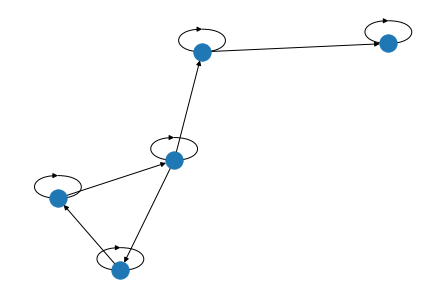

In [16]:
G = dgl.to_networkx(g)
plt.figure()
nx.draw(G)

In [15]:
import dgl.data

dataset = dgl.data.CoraGraphDataset()
print('Number of categories:', dataset.num_classes)

  NumNodes: 2708
  NumEdges: 10556
  NumFeats: 1433
  NumClasses: 7
  NumTrainingSamples: 140
  NumValidationSamples: 500
  NumTestSamples: 1000
Done loading data from cached files.
Number of categories: 7


In [17]:
g = dataset[0]

In [18]:
print('Node features')
print(g.ndata)
print('Edge features')
print(g.edata)

Node features
{'feat': tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]]), 'label': tensor([3, 4, 4,  ..., 3, 3, 3]), 'test_mask': tensor([False, False, False,  ...,  True,  True,  True]), 'train_mask': tensor([ True,  True,  True,  ..., False, False, False]), 'val_mask': tensor([False, False, False,  ..., False, False, False])}
Edge features
{}


In [19]:
g.number_of_edges()

10556

In [20]:
from random import randrange
edge_weight = randrange(10)* th.ones(g.number_of_edges())